In [8]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

/Users/houzhuo/Documents/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
import pandas as pd
cap = pd.read_csv("/Users/houzhuo/Downloads/capdata3.csv")
robot    = pd.read_csv("/Users/houzhuo/Downloads/robot.csv")
full = pd.concat([cap,robot],axis=1)
full.head()

,No,1,2,3,4,5,6,7,8,9,...,Shoulder_L,Hiproll_R,Shoulder_R,Hip,Moe,Hip_R,Head,Shoulder_peach_L,Head_pitch,Shoulder_pitch_R
0,1,-70.2093,77.6512,-2.40005,-30.6520,-70.7097,-18.5101,-1.48789,6.43077,-90.1392,...,-2016.000000,0.000000,2199.000000,0.0,261.000000,0.0,916.000000,1072.0,-271.0,-1028.0
1,2,-70.2093,77.6512,-2.40005,-30.0076,-70.6074,-17.7873,-1.51620,6.45095,-90.1584,...,-2018.228261,-5.869565,2193.141304,0.0,261.608696,0.0,917.586956,1072.0,-271.0,-1028.0
2,3,-70.2093,77.6512,-2.40005,-29.4269,-70.5241,-17.1182,-1.53064,6.46612,-90.1798,...,-2020.456522,-11.739130,2187.282609,0.0,262.217391,0.0,919.173913,1072.0,-271.0,-1028.0
3,4,-70.2093,77.6512,-2.40005,-28.9343,-70.4591,-16.5383,-1.52306,6.47134,-90.2022,...,-2022.684783,-17.608696,2181.423913,0.0,262.826087,0.0,920.760870,1072.0,-271.0,-1028.0
4,5,-70.2093,77.6512,-2.40005,-28.3700,-70.3946,-15.9114,-1.51531,6.47130,-90.2185,...,-2024.913043,-23.478261,2175.565217,0.0,263.434783,0.0,922.347826,1072.0,-271.0,-1028.0


In [10]:
cap_headx = full['76']
cap_heady = full['77']
cap_headz = full['78']
#cap_head = pd.concat(cap_headx,cap_heady,cap_headz)
dataset = pd.concat( [  full['76'],full['77'],full['78'],full['Head'] ] , axis=1 )
dataset.head()
type(dataset)

pandas.core.frame.DataFrame

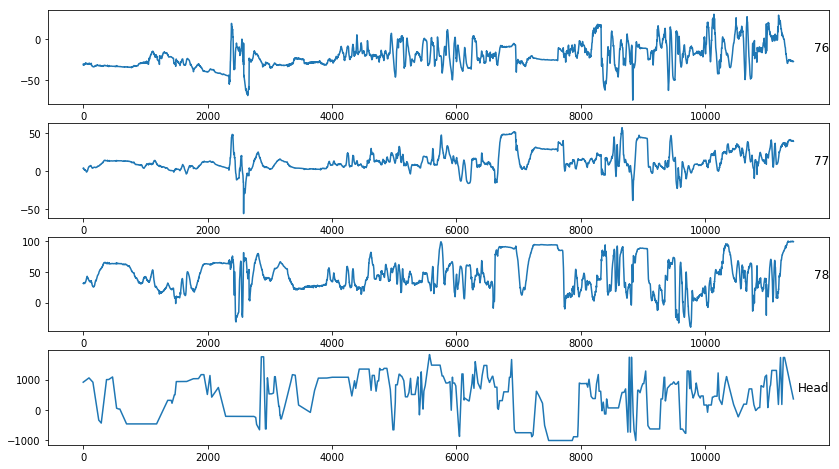

In [11]:
import matplotlib.pyplot as plt
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i=1
plt.figure(figsize=(14,8))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [12]:
import numpy as np
#values = dataset.values
values = dataset.astype(np.float32)
#values -= np.mean(values, axis = 0)
# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# frame as supervised learning
#reframed = series_to_supervised(scaled, 1, 1)
reframed = series_to_supervised(values,1,1)
reframed.head()


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,-30.878500,3.41886,31.362200,916.000000,-30.315399,3.80461,31.606899,917.586975
2,-30.315399,3.80461,31.606899,917.586975,-29.928900,4.06432,31.775600,919.173889
3,-29.928900,4.06432,31.775600,919.173889,-29.947300,4.08651,31.813900,920.760864
4,-29.947300,4.08651,31.813900,920.760864,-30.045000,4.05349,31.772400,922.347839
5,-30.045000,4.05349,31.772400,922.347839,-30.128000,4.03629,31.649401,923.934753


In [13]:
reframed.drop(reframed.columns[[5,6,7]],axis=1,inplace = True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t)
1,-30.878500,3.41886,31.362200,916.000000,-30.315399
2,-30.315399,3.80461,31.606899,917.586975,-29.928900
3,-29.928900,4.06432,31.775600,919.173889,-29.947300
4,-29.947300,4.08651,31.813900,920.760864,-30.045000
5,-30.045000,4.05349,31.772400,922.347839,-30.128000


In [39]:
values = reframed.values
train = values[:8000,:]
val = values[8000:10000,:]
test = values[10000:,:]
train_X,train_y = train[:,:-1],train[:,-1]
val_X,val_y = val[:,:-1],val[:,-1]#第一个多少行
test_X,test_y = test[:,:-1],test[:,-1]
train_X = train_X.reshape(train_X.shape[0],1,train_X.shape[1])
val_X = val_X.reshape(val_X.shape[0],1,val_X.shape[1])
test_X = test_X.reshape(test_X.shape[0],1,test_X.shape[1])
print(train_X.shape,train_y.shape,val_X.shape,val_y.shape,test_X.shape,test_y.shape)

(8000, 1, 4) (8000,) (2000, 1, 4) (2000,) (1419, 1, 4) (1419,)


In [40]:
test_X.shape

(1419, 1, 4)

Train on 8000 samples, validate on 1419 samples
Epoch 1/50
 - 3s - loss: 23.3118 - val_loss: 15.4065
Epoch 2/50
 - 1s - loss: 21.6409 - val_loss: 15.0199
Epoch 3/50
 - 0s - loss: 19.5055 - val_loss: 14.6444
Epoch 4/50
 - 1s - loss: 17.2683 - val_loss: 14.1551
Epoch 5/50
 - 1s - loss: 14.9575 - val_loss: 13.8292
Epoch 6/50
 - 1s - loss: 13.0659 - val_loss: 14.1031
Epoch 7/50
 - 1s - loss: 10.5827 - val_loss: 13.5776
Epoch 8/50
 - 1s - loss: 9.3552 - val_loss: 13.9361
Epoch 9/50
 - 1s - loss: 8.1939 - val_loss: 13.9683
Epoch 10/50
 - 1s - loss: 7.6331 - val_loss: 13.6522
Epoch 11/50
 - 1s - loss: 7.2999 - val_loss: 13.5309
Epoch 12/50
 - 0s - loss: 7.3841 - val_loss: 13.1984
Epoch 13/50
 - 1s - loss: 6.6926 - val_loss: 12.8663
Epoch 14/50
 - 0s - loss: 7.2561 - val_loss: 12.6272
Epoch 15/50
 - 1s - loss: 6.4720 - val_loss: 13.0075
Epoch 16/50
 - 1s - loss: 6.3186 - val_loss: 12.6783
Epoch 17/50
 - 0s - loss: 6.5442 - val_loss: 12.8295
Epoch 18/50
 - 1s - loss: 6.9184 - val_loss: 12.5053


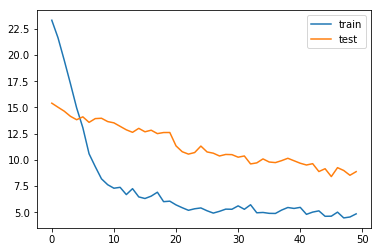

In [41]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [43]:
print(test_X.shape)
# make a prediction
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
#inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
#inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)

(1419, 1, 4)
Test RMSE: 10.860


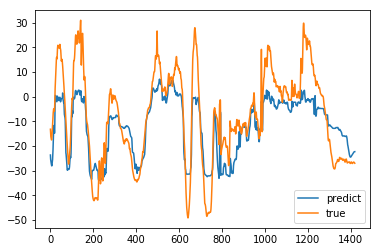

In [45]:
plt.figure()
plt.plot(yhat, label = 'predict')
plt.plot(test_y, label = 'true')
plt.legend()
plt.show()